In [1]:
import sys  
sys.path.insert(0, '/home/asimon/Projects/myfirstrobot/')
from myLib.myCosas import myEnv
from myLib.myCosas import distance_sqrt_cal
import gym
import rlbench.gym
from stable_baselines3 import A2C
from matplotlib import pyplot as plt

import numpy as np
env_name = 'reach_target-state-v0'
render_mode = 'rgb_array'
observation_mode = 'state'
policy_mode = 'MlpPolicy'
model_name = 'A2C'
reward_model = 'mode2'
name_model = env_name + '_' + render_mode + '_' + model_name + '_' + reward_model
print(name_model)
env = gym.make(env_name, render_mode=render_mode, observation_mode=observation_mode)
env = myEnv(env, mode=reward_model)
model = A2C(policy_mode, env, verbose=1, tensorboard_log="./tb_log_name/")


reach_target-state-v0_rgb_array_A2C_mode2
Wrapping the environment in a homemade step to do cosas model mode2

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Reset environment, initial distance is 0.725965996191391

Distance sqr: 0.3086636910202384



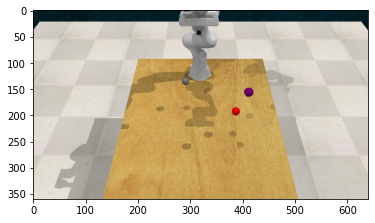

In [19]:
obs = env.reset()
env.task._task.target.set_position([0.35000000, 0.22000000, 0.97000000])
obs, _, _, _ = env.step(np.array([0,0,0,0,0,0,0,0]))
print("Distance sqr: {0}\n".format(distance_sqrt_cal(obs)))
episode_rewards = [0.0]
img = env.render(mode=render_mode)
fig = plt.figure()
im = plt.imshow(img)
plt.show()

In [20]:
counter = 0
maxcounter=5
while counter < maxcounter:
    counter+=1
    action = np.array([0.0,-0.5,0.0,-1,0.0,0,0.0,0.0])
    obs, reward, done, info = env.step(action)
print("Distance sqr: {0}, reward: {1}\n".format(distance_sqrt_cal(obs),reward))
print(done)

Distance sqr: 0.2761651684212438, reward: -1.2761651684212438

False


Distance sqr: 1.461027311609261, reward: -2.4610273116092607

Position: [ 0.2  -0.25  0.25]


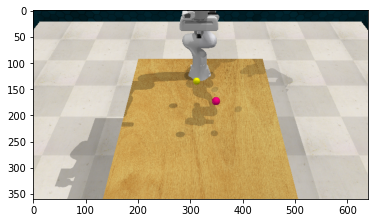

In [21]:

position = env.task._task.target.get_position()
img = env.render(mode=render_mode)
m = plt.imshow(img)
print("Distance sqr: {0}, reward: {1}\n".format(distance_sqrt_cal(obs),reward))
print("Position: {}".format(position))

In [14]:
print(env.task._task.target.get_position())

[0.35146344 0.21861032 0.97300971]
